In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def random_points(filename, n_points):
    """
    Load image, resize it to have 720 width, use Canny algorithm to get edges,
    than create a file with n_points random points and 10 points from each edge of the image
    saving the coordinates (x, y) and the original colors of the image. 
    """
    color_img = cv2.imread('images/' + filename)
    color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB) 
    plt.imshow(color_img)
    plt.show()
    img = color_img.copy()
    color_img = np.array(color_img)
    dim = np.array(img.shape)
    dim = (dim/dim[0] * 720).astype(np.uint32)
    img = cv2.resize(img, (dim[0], dim[1]), interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    x_ind = np.random.choice(list(range(dim[0])), n_points)
    y_ind = np.random.choice(list(range(dim[1])), n_points)
    filename = filename.split('.')[0]
    with open('images/' + filename + '_' + str(n_points) + '_random_points.txt', 'w') as f:
        for i in range(n_points):
            x_i = x_ind[i]
            y_i = y_ind[i]
            rgb = color_img[x_i, y_i]
            s = ''
            s += str(x_i) + ' ' + str(y_i) + ' '
            s += str(rgb[0]) + ' ' + str(rgb[1]) + ' ' + str(rgb[2]) + '\n'
            f.write(s)
            
    x_ind = np.random.choice(list(range(dim[0])), 10)
    y_ind = np.random.choice(list(range(dim[1])), 10)
    with open('images/' + filename + '_' + str(n_points) + '_random_points.txt', 'a') as f:
        for i in range(10):
            for (x_i, y_i) in [(0, y_ind[i]), (dim[0] - 1, y_ind[i]), (x_ind[i], 0), (x_ind[i], dim[1] - 1)]:
                rgb = color_img[x_i, y_i]
                s = ''
                s += str(x_i) + ' ' + str(y_i) + ' '
                s += str(rgb[0]) + ' ' + str(rgb[1]) + ' ' + str(rgb[2]) + '\n'
                f.write(s)
    return

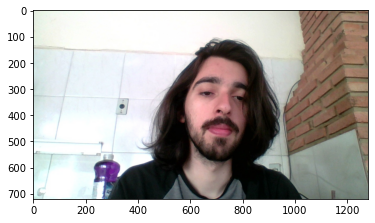

In [44]:
random_points('me.jpg', 500)

In [21]:
def create_points(filename, n_points = 100):
    """
    Load image, resize it to have 720 width, use Canny algorithm to get edges,
    than create a file with n_points random points from the edges
    saving the coordinates (x, y) and the original colors of the image. 
    """
    color_img = cv2.imread('images/' + filename)
    filename = filename.split('.')[0]
    color_img = np.array(color_img)
    img = color_img.copy()
    dim = np.array(img.shape)
    dim = (dim/dim[0] * 720).astype(np.uint32)
    img = cv2.resize(img, (dim[0], dim[1]), interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.Canny(image=img, threshold1=60, threshold2=100) # Canny Edge Detection
    x, y = np.where(img > 0)
    n_max_points = x.shape[0]
    indices = np.random.choice(list(range(n_max_points)), n_points)
    with open('images/' + filename + '_' + str(n_points) + '_points.txt', 'w') as f:
        for i in indices:
            rgb = color_img[x[i], y[i]]
            s = ''
            s += str(x[i]) + ' ' + str(y[i]) + ' '
            s += str(rgb[0]) + ' ' + str(rgb[1]) + ' ' + str(rgb[2]) + '\n'
            f.write(s)
            
    x_ind = np.random.choice(list(range(dim[0])), 10)
    y_ind = np.random.choice(list(range(dim[1])), 10)
    with open('images/' + filename + '_' + str(n_points) + '_points.txt', 'a') as f:
        for i in range(10):
            for (x_i, y_i) in [(0, y_ind[i]), (dim[0] - 1, y_ind[i]), (x_ind[i], 0), (x_ind[i], dim[1] - 1)]:
                rgb = color_img[x_i, y_i]
                s = ''
                s += str(x_i) + ' ' + str(y_i) + ' '
                s += str(rgb[0]) + ' ' + str(rgb[1]) + ' ' + str(rgb[2]) + '\n'
                f.write(s)
    return

In [22]:
create_points('cat.jpg')
create_points('cat.jpg', 1000)
create_points('cat.jpg', 10000)

In [23]:
random_points('cat.jpg', 20)
random_points('cat.jpg', 500)
random_points('me.jpg', 20)
random_points('me.jpg', 500)

In [34]:
import json

In [37]:
triangulation

[{'points': [[679.002, 450.027], [645.006, 442.001], [631.004, 489.001]],
  'colors': [[214, 225, 223], [249, 254, 253], [248, 247, 237]]},
 {'points': [[645.006, 442.001], [679.002, 450.027], [671.001, 441.003]],
  'colors': [[249, 254, 253], [214, 225, 223], [250, 255, 254]]},
 {'points': [[598.003, 92.0085], [580.014, 0.0019305], [541.004, 35.0081]],
  'colors': [[243, 253, 247], [102, 123, 155], [255, 254, 253]]},
 {'points': [[580.014, 0.0019305], [598.003, 92.0085], [657.002, 0.00578035]],
  'colors': [[102, 123, 155], [243, 253, 247], [255, 255, 251]]},
 {'points': [[325.002, 282.001], [282.01, 246.002], [315.003, 284.002]],
  'colors': [[253, 254, 234], [98, 117, 160], [35, 33, 63]]},
 {'points': [[282.01, 246.002], [325.002, 282.001], [360.012, 236.002]],
  'colors': [[98, 117, 160], [253, 254, 234], [251, 253, 254]]},
 {'points': [[339.001, 7.00124], [368, 3.00307], [354.002, 0.00625]],
  'colors': [[97, 122, 162], [86, 107, 139], [251, 243, 220]]},
 {'points': [[368, 3.00307

In [229]:
color_img = cv2.imread('images/cat.jpg')
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB) 
color_img = np.array(color_img)
dim = np.array(color_img.shape)
dim = (dim/dim[0] * 720).astype(np.uint32)
color_img = cv2.resize(color_img, (dim[1], dim[0]), interpolation = cv2.INTER_AREA)

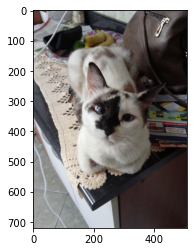

In [230]:
plt.imshow(color_img)

In [221]:
color_img.shape

(509, 720, 3)

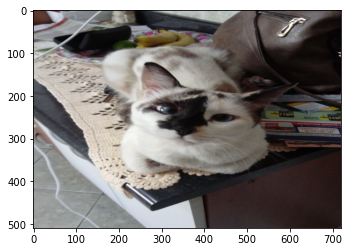

In [222]:
plt.imshow(color_img)

In [224]:
with open('images/cat_500_random_points.json', 'r') as f:
    triangulation = json.load(f)

In [225]:
for i in range(len(triangulation)):
    triangulation[i]['points'] = np.array(triangulation[i]['points'])
    triangulation[i]['colors'] = np.array(triangulation[i]['colors'])

In [227]:
color_img.shape

(509, 720, 3)

[array([28, 20, 18], dtype=uint8), array([45, 32, 31], dtype=uint8), array([17, 13, 14], dtype=uint8)] [[171 167 166]
 [155 149 144]
 [115 121 116]]
[array([45, 32, 31], dtype=uint8), array([28, 20, 18], dtype=uint8), array([57, 64, 47], dtype=uint8)] [[155 149 144]
 [171 167 166]
 [160 157 153]]
[array([53, 56, 61], dtype=uint8), array([127, 113,  74], dtype=uint8), array([68, 69, 75], dtype=uint8)] [[216 206 199]
 [146 147 145]
 [136 132 127]]
[array([127, 113,  74], dtype=uint8), array([53, 56, 61], dtype=uint8), array([119, 105,  68], dtype=uint8)] [[146 147 145]
 [216 206 199]
 [169 160 156]]
[array([154, 157, 173], dtype=uint8), array([26, 27, 29], dtype=uint8), array([9, 9, 9], dtype=uint8)] [[201 186 183]
 [135 132 128]
 [169 170 166]]
[array([26, 27, 29], dtype=uint8), array([154, 157, 173], dtype=uint8), array([161, 160, 150], dtype=uint8)] [[135 132 128]
 [201 186 183]
 [137 130 127]]
[array([10,  9,  7], dtype=uint8), array([54, 36, 34], dtype=uint8), array([17, 17, 17], dt

[array([16, 12,  9], dtype=uint8), array([29, 20, 18], dtype=uint8), array([21, 13, 11], dtype=uint8)] [[ 57  58  68]
 [ 39  36  32]
 [170 167 163]]
[array([29, 20, 18], dtype=uint8), array([16, 12,  9], dtype=uint8), array([13,  9,  8], dtype=uint8)] [[ 39  36  32]
 [ 57  58  68]
 [113 106 109]]
[array([20, 14, 14], dtype=uint8), array([21, 13, 11], dtype=uint8), array([20, 15, 12], dtype=uint8)] [[ 90 103 177]
 [179 172 169]
 [ 15  13  13]]
[array([21, 13, 11], dtype=uint8), array([20, 14, 14], dtype=uint8), array([11,  7,  8], dtype=uint8)] [[179 172 169]
 [ 90 103 177]
 [148 147 143]]
[array([194, 183, 167], dtype=uint8), array([212, 202, 192], dtype=uint8), array([202, 189, 179], dtype=uint8)] [[165 154 150]
 [ 15  13  12]
 [156 154 153]]
[array([212, 202, 192], dtype=uint8), array([194, 183, 167], dtype=uint8), array([81, 66, 59], dtype=uint8)] [[ 15  13  12]
 [165 154 150]
 [ 11   9   9]]
[array([237, 225, 209], dtype=uint8), array([242, 234, 223], dtype=uint8), array([218, 205,

 [ 27  22  23]]
[array([99, 84, 79], dtype=uint8), array([101,  93,  91], dtype=uint8), array([99, 83, 70], dtype=uint8)] [[161 160 156]
 [ 29  19  42]
 [230 219 211]]
[array([101,  93,  91], dtype=uint8), array([99, 84, 79], dtype=uint8), array([146, 147, 142], dtype=uint8)] [[ 29  19  42]
 [161 160 156]
 [155 151 150]]
[array([99, 85, 76], dtype=uint8), array([99, 84, 79], dtype=uint8), array([99, 83, 70], dtype=uint8)] [[193 192 188]
 [161 160 156]
 [230 219 211]]
[array([101,  93,  91], dtype=uint8), array([146, 147, 142], dtype=uint8), array([83, 79, 70], dtype=uint8)] [[ 29  19  42]
 [155 151 150]
 [162 159 155]]
[array([101,  93,  91], dtype=uint8), array([83, 79, 70], dtype=uint8), array([85, 82, 77], dtype=uint8)] [[ 29  19  42]
 [162 159 155]
 [127 140 148]]
[array([167, 164, 157], dtype=uint8), array([168, 165, 156], dtype=uint8), array([143, 136, 128], dtype=uint8)] [[120 113 120]
 [ 38  40  50]
 [139 146 141]]
[array([136, 132, 121], dtype=uint8), array([122, 118, 109], dt

[array([14, 10,  9], dtype=uint8), array([7, 5, 6], dtype=uint8), array([6, 4, 5], dtype=uint8)] [[ 27  28  38]
 [200 194 187]
 [203 208 207]]
[array([69, 70, 75], dtype=uint8), array([27, 22, 19], dtype=uint8), array([68, 66, 69], dtype=uint8)] [[131 132 128]
 [206 191 188]
 [148 149 145]]
[array([27, 22, 19], dtype=uint8), array([69, 70, 75], dtype=uint8), array([74, 71, 70], dtype=uint8)] [[206 191 188]
 [131 132 128]
 [  8   8   8]]
[array([209, 200, 193], dtype=uint8), array([204, 195, 188], dtype=uint8), array([202, 193, 186], dtype=uint8)] [[ 42  39  35]
 [151 150 146]
 [ 52  62  96]]
[array([179, 182, 191], dtype=uint8), array([164, 168, 171], dtype=uint8), array([10, 11, 13], dtype=uint8)] [[ 82 109  99]
 [148 144 143]
 [170 169 165]]
[array([164, 168, 171], dtype=uint8), array([179, 182, 191], dtype=uint8), array([161, 166, 168], dtype=uint8)] [[148 144 143]
 [ 82 109  99]
 [173 169 168]]
[array([122,  68,  72], dtype=uint8), array([124, 124, 132], dtype=uint8), array([145, 1

[array([135, 134, 130], dtype=uint8), array([83, 69, 67], dtype=uint8), array([132, 128, 119], dtype=uint8)] [[184 155 178]
 [196 193 185]
 [140 137 139]]
[array([83, 69, 67], dtype=uint8), array([135, 134, 130], dtype=uint8), array([127, 116, 112], dtype=uint8)] [[196 193 185]
 [184 155 178]
 [161 158 154]]
[array([138, 134, 127], dtype=uint8), array([132, 128, 119], dtype=uint8), array([143, 136, 128], dtype=uint8)] [[ 10   8   8]
 [140 137 139]
 [139 146 141]]
[array([38, 36, 37], dtype=uint8), array([222, 222, 220], dtype=uint8), array([227, 228, 223], dtype=uint8)] [[165 162 158]
 [ 11   9   9]
 [ 29  30  51]]
[array([222, 222, 220], dtype=uint8), array([38, 36, 37], dtype=uint8), array([238, 242, 243], dtype=uint8)] [[ 11   9   9]
 [165 162 158]
 [209 200 197]]
[array([188, 176, 160], dtype=uint8), array([241, 242, 237], dtype=uint8), array([207, 203, 198], dtype=uint8)] [[159 155 154]
 [149 147 146]
 [157 154 150]]
[array([88, 84, 75], dtype=uint8), array([10, 10, 10], dtype=uin

[array([238, 242, 243], dtype=uint8), array([90, 79, 75], dtype=uint8), array([239, 241, 238], dtype=uint8)] [[209 200 197]
 [101  69 128]
 [157 156 152]]
[array([238, 242, 243], dtype=uint8), array([146, 116, 111], dtype=uint8), array([196, 177, 167], dtype=uint8)] [[209 200 197]
 [200 200 194]
 [ 49  58  92]]
[array([146, 116, 111], dtype=uint8), array([238, 242, 243], dtype=uint8), array([80, 69, 67], dtype=uint8)] [[200 200 194]
 [209 200 197]
 [154 147 144]]
[array([166, 162, 161], dtype=uint8), array([83, 69, 67], dtype=uint8), array([101,  86,  81], dtype=uint8)] [[155 165 172]
 [196 193 185]
 [156 154 153]]
[array([119, 105,  68], dtype=uint8), array([142, 138, 135], dtype=uint8), array([114,  96,  55], dtype=uint8)] [[169 160 156]
 [ 44  52  89]
 [165 154 150]]
[array([68, 69, 75], dtype=uint8), array([ 96, 102,  95], dtype=uint8), array([189, 195, 193], dtype=uint8)] [[136 132 127]
 [145 139 134]
 [179 186 179]]
[array([ 96, 102,  95], dtype=uint8), array([68, 69, 75], dtype=

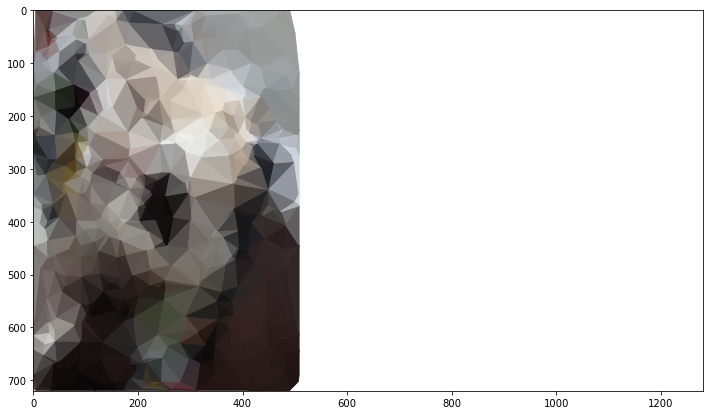

In [228]:
plt.figure(figsize = (12, 7))
plt.xlim((0, 1280))
plt.ylim((720, 0))
for t in triangulation:
    colors = [color_img[int(y), int(x)] for (x, y) in t['points']]
    print(colors, t['colors'])
    color = np.mean(colors, axis = 0)/255
    #color = np.array([np.mean(color)] * 3)
    plt_t = plt.Polygon([[y, x] for (x, y) in t['points']], color=color)
    plt.gca().add_patch(plt_t)

plt.show()